In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./Church_account_2022-2023.csv',parse_dates=['Date'])
df

,ID#,Date,Head,RCPT,Narration,Receipt,Payment
0,1,2022-02-04,Sunday School Expense,10,Lamp oil,0,100
1,2,2022-03-04,Offerings for Daily Expense(C),1,Nithya chilav,3150,0
2,3,2022-03-04,"Offerings, Auction, Bhandaram etc-(Nercha)(C)",2,Kozhi leelam varav,250,0
3,4,2022-03-04,"Offerings, Auction, Bhandaram etc-(Nercha)(C)",3,Paavakka leelam,30,0
4,5,2022-03-04,Donation/Offering for Special Purposes(C),4,Chirappurath Jinu ( 1 month salary ) - kadam v...,5805,0
...,...,...,...,...,...,...,...
1452,1453,2023-03-31,Repair & Maintenance,969,"For buying Milk, battery",0,120
1453,1454,2023-03-31,Sacristian,971,Sacristian allowance,0,7000
1454,1455,2023-03-31,Rev. Fr. Vicar,972,Allowance to Fr,0,10000
1455,1456,2023-03-31,Accountant,973,Accountant allowance,0,3000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID#        1457 non-null   int64         
 1   Date       1457 non-null   datetime64[ns]
 2   Head       1457 non-null   object        
 3   RCPT       1457 non-null   int64         
 4   Narration  1457 non-null   object        
 5   Receipt    1457 non-null   int64         
 6   Payment    1457 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 79.8+ KB


### Creating a column for profit

positive sign represents the amount is marked as profit else the negative sign represents the amount is marked as a loss

In [4]:
df['Profit'] = df['Receipt'] - df['Payment']

### Spitting the Date column to Month and day

Here, year is not represeted. Since, this is the annual account sttement of the church from 1st April 2022 to 31st march 2023

In [5]:
df['Month'] = df.Date.dt.month

In [6]:
df['Day'] = df.Date.dt.day

In [7]:
df

,ID#,Date,Head,RCPT,Narration,Receipt,Payment,Profit,Month,Day
0,1,2022-02-04,Sunday School Expense,10,Lamp oil,0,100,-100,2,4
1,2,2022-03-04,Offerings for Daily Expense(C),1,Nithya chilav,3150,0,3150,3,4
2,3,2022-03-04,"Offerings, Auction, Bhandaram etc-(Nercha)(C)",2,Kozhi leelam varav,250,0,250,3,4
3,4,2022-03-04,"Offerings, Auction, Bhandaram etc-(Nercha)(C)",3,Paavakka leelam,30,0,30,3,4
4,5,2022-03-04,Donation/Offering for Special Purposes(C),4,Chirappurath Jinu ( 1 month salary ) - kadam v...,5805,0,5805,3,4
...,...,...,...,...,...,...,...,...,...,...
1452,1453,2023-03-31,Repair & Maintenance,969,"For buying Milk, battery",0,120,-120,3,31
1453,1454,2023-03-31,Sacristian,971,Sacristian allowance,0,7000,-7000,3,31
1454,1455,2023-03-31,Rev. Fr. Vicar,972,Allowance to Fr,0,10000,-10000,3,31
1455,1456,2023-03-31,Accountant,973,Accountant allowance,0,3000,-3000,3,31


### List of predefined heads 

In [8]:
df['Head'].unique()

array(['Sunday School Expense', 'Offerings for Daily Expense(C)',
       'Offerings, Auction, Bhandaram etc-(Nercha)(C)',
       'Donation/Offering for Special Purposes(C)',
       'Parish Hall Charges Collected(C)', 'Repair & Maintenance',
       'STATIONARY', 'Telephone & Postage',
       'Donation from the Diocese Disbursed', 'Miscellaneous Expenses',
       'SOUTH INDIAN BANK - BHAVANA NIRMANAM',
       'Donation from Diocese for Charity Works', 'Travelling Expense',
       'bank s/b withdrawal', 'Church Feast - Expenses',
       "Seminarian's Aid Fund", 'Holy Land', 'Loans & Advances-Received',
       'Rev. Fr. Vicar', 'Hunger & Disease', 'A.K.C.C. Fund',
       'Justice Sunday', 'Jesus Fraternity',
       'Mission Syro Malabar (Preshithavaram)', 'SOUTH INDIAN BANK PALA',
       'Church Feast - Collection', 'Miscellaneous Income(C)',
       'Electricity Charges', 'Candle Offerings(C)', 'Accountant',
       'Sacristian', 'Sweeper', 'Marriage Offerings (Passaram)(C)',
       'Charge

### Finding the usage of each heads on this church account

In [9]:
df.groupby(['Head'])['Head'].count().reset_index(name='count of heads')

,Head,count of heads
0,A.K.C.C. Fund,1
1,Accountant,12
2,"Adima, Kazhunu, Mudi etc.(C)",6
3,Advance from Agriculture Account,9
4,Advance to Agriculture Account,8
...,...,...
63,Tomb Expense Collected(C),5
64,Tomb-Fees-Collected(C),9
65,Travelling Expense,84
66,"Wine,Candle, Host, ,Incense Etc.",17


In [10]:
data = df.groupby(['Head'])['Receipt','Payment','Profit'].sum()
data.reset_index(inplace=True)

In [11]:
data

,Head,Receipt,Payment,Profit
0,A.K.C.C. Fund,0,2000,-2000
1,Accountant,0,34500,-34500
2,"Adima, Kazhunu, Mudi etc.(C)",72060,3634,68426
3,Advance from Agriculture Account,217783,28405,189378
4,Advance to Agriculture Account,0,209616,-209616
...,...,...,...,...
63,Tomb Expense Collected(C),20100,55000,-34900
64,Tomb-Fees-Collected(C),46800,0,46800
65,Travelling Expense,0,50700,-50700
66,"Wine,Candle, Host, ,Incense Etc.",1000,13585,-12585


### Finding the heads which gave profits to the church

In [12]:
profitables = data[data['Profit'] > 0]
profitable_heads = []
for i in profitables['Head']:
    profitable_heads.append(i)
print('Number of heads gave profits to the church : ',len(profitable_heads))
print('*'*100)
print(profitable_heads)


Number of heads gave profits to the church :  25
****************************************************************************************************
['Adima, Kazhunu, Mudi etc.(C)', 'Advance from Agriculture Account', 'Bank Interest/ Other Interest Received (C)', 'Candle Offerings(C)', 'Charges from Church Articles', 'Church Feast - Collection', 'Default Fee Received(C)', 'Donation & Gifts-Income(C)', 'Donation from Diocese for Charity Works', 'Donation/Offering for Special Purposes(C)', 'FD Best Alter boy and girl', 'FD Sunday School', 'Funeral Offerings(C)', 'Loans & Advances-Received', 'Marriage Offerings (Passaram)(C)', 'Miscellaneous Income(C)', 'Offerings for Daily Expense(C)', 'Offerings for Special Purpose(D)', 'Offerings, Auction, Bhandaram etc-(Nercha)(C)', 'PARISH DIRECTORY', 'Parish Hall Charges Collected(C)', 'SOUTH INDIAN BANK PALA', 'Sale of Old Things', 'Tomb-Fees-Collected(C)', 'bank s/b withdrawal']


In [104]:
data1 = data.sort_values(by='Profit',ascending=False).reset_index(drop=True)

In [105]:
data1

,Head,Receipt,Payment,Profit
0,bank s/b withdrawal,442768,40018,402750
1,Donation/Offering for Special Purposes(C),614282,290425,323857
2,Loans & Advances-Received,233000,0,233000
3,Advance from Agriculture Account,217783,28405,189378
4,"Offerings, Auction, Bhandaram etc-(Nercha)(C)",176233,0,176233
...,...,...,...,...
63,Sunday School Expense,0,130859,-130859
64,Rev. Fr. Vicar,0,156000,-156000
65,Advance to Agriculture Account,0,209616,-209616
66,Church Feast - Expenses,500,241157,-240657


In [106]:
data1.Profit.sum()

-838

###### This shows the chuch has more expenses than income.

In [14]:
m = data1.T
m

,67,20,35,3,45,43,48,53,18,22,2,13,23,64,38,46,17,44,57,11,6,9,25,41,16,24,27,5,58,26,49,0,7,31,55,37,33,47,29,39,42,15,30,28,61,36,66,32,8,40,1,63,65,60,21,54,12,10,62,56,34,52,19,59,51,4,14,50
Head,bank s/b withdrawal,Donation/Offering for Special Purposes(C),Loans & Advances-Received,Advance from Agriculture Account,"Offerings, Auction, Bhandaram etc-(Nercha)(C)",Offerings for Daily Expense(C),Parish Hall Charges Collected(C),SOUTH INDIAN BANK PALA,Donation from Diocese for Charity Works,FD Best Alter boy and girl,"Adima, Kazhunu, Mudi etc.(C)",Church Feast - Collection,FD Sunday School,Tomb-Fees-Collected(C),Marriage Offerings (Passaram)(C),PARISH DIRECTORY,Donation & Gifts-Income(C),Offerings for Special Purpose(D),Sale of Old Things,Charges from Church Articles,Bank Interest/ Other Interest Received (C),Candle Offerings(C),Funeral Offerings(C),Miscellaneous Income(C),Default Fee Received(C),Family Aid Fund,Holy Land,Bank Charges,Seminarian's Aid Fund,Holy Chidhood,Peter's Pence,A.K.C.C. Fund,Bible Sunday,K.C.Y.M.,Sabha Dinam,Madhya Virutha Dinam,License & Tax,Pala Caritas,Jesus Fraternity,Mass Media,Mission Syro Malabar (Preshithavaram),Computer Assistant,Justice Sunday,Hunger & Disease,Telephone & Postage,Machinery & Equipments,"Wine,Candle, Host, ,Incense Etc.",Legal & Audit Fees,CHARITY,Miscellaneous Expenses,Accountant,Tomb Expense Collected(C),Travelling Expense,Sweeper,Electricity Charges,STATIONARY,Church Articles & Vestments,Cathedraticum Fees to the Diocese(D),Thirattu Form(D),Sacristian,Loans & Advances-Paid,SOUTH INDIAN BANK - BHAVANA NIRMANAM,Donation from the Diocese Disbursed,Sunday School Expense,Rev. Fr. Vicar,Advance to Agriculture Account,Church Feast - Expenses,Repair & Maintenance
Receipt,442768,614282,233000,217783,176233,168634,127000,806315,149000,80000,72060,64686,65190,46800,29000,22300,21830,16420,9733,8000,4543,2617,1800,2590,500,3000,6000,0,2825,14400,0,0,0,0,0,0,0,0,0,0,4000,0,0,0,0,0,1000,0,0,1000,0,20100,0,0,0,0,3000,0,0,0,0,30000,0,0,0,0,500,0
Payment,40018,290425,0,28405,0,0,0,683814,40000,0,3634,0,5190,0,0,0,0,100,0,2910,382,0,0,840,0,3000,6000,110,3000,15500,1500,2000,2000,2000,2500,2500,2629,3000,3300,3500,7500,4000,4000,4500,7278,8500,13585,18720,19500,34188,34500,55000,50700,54000,54516,64136,71235,75000,77992,81000,100000,130000,127000,130859,156000,209616,241157,487008
Profit,402750,323857,233000,189378,176233,168634,127000,122501,109000,80000,68426,64686,60000,46800,29000,22300,21830,16320,9733,5090,4161,2617,1800,1750,500,0,0,-110,-175,-1100,-1500,-2000,-2000,-2000,-2500,-2500,-2629,-3000,-3300,-3500,-3500,-4000,-4000,-4500,-7278,-8500,-12585,-18720,-19500,-33188,-34500,-34900,-50700,-54000,-54516,-64136,-68235,-75000,-77992,-81000,-100000,-100000,-127000,-130859,-156000,-209616,-240657,-487008


### Creating a new column or loss to differentiate profit and loss

In [109]:
for i in data1.index:
    if data1.loc[i, 'Profit'] < 0:
        data1.loc[i, 'loss'] = -data1.loc[i, 'Profit']
        data1.loc[i, 'Profit'] = 0
    else:
        data1.loc[i, 'loss'] = 0


In [112]:
data1.tail()

,Head,Receipt,Payment,Profit,loss
63,Sunday School Expense,0,130859,0,130859.0
64,Rev. Fr. Vicar,0,156000,0,156000.0
65,Advance to Agriculture Account,0,209616,0,209616.0
66,Church Feast - Expenses,500,241157,0,240657.0
67,Repair & Maintenance,0,487008,0,487008.0


### Finding the top 10 heads which gave profits to the church

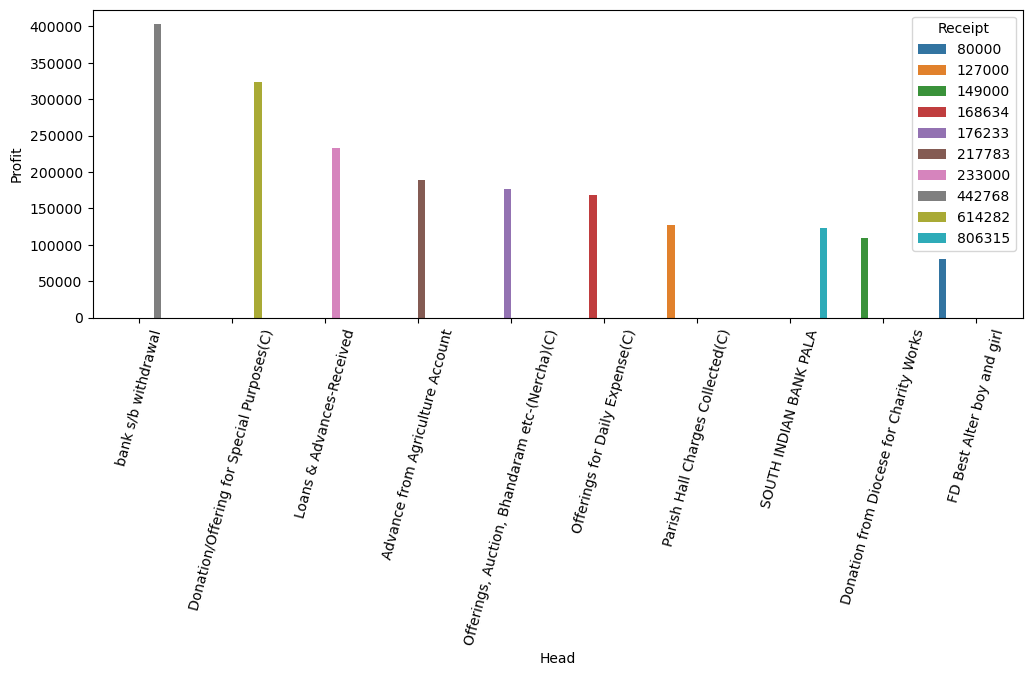

In [43]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=75)
sns.barplot(data=data1[0:10], x='Head', y='Profit', hue='Receipt')
plt.show()

### Finding the top 10 heads which gave losses to the church

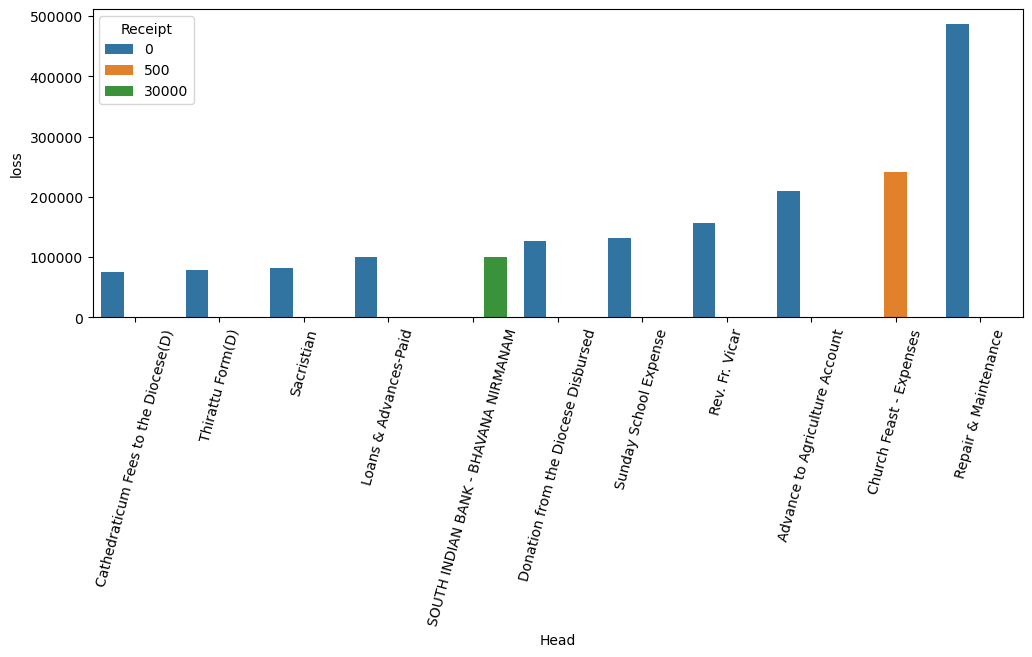

In [113]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=75)
sns.barplot(data=data1[-11:], x='Head', y='loss', hue='Receipt')
plt.show()

###### This shows that repair and maintance and church feast - expenses are the heads which makes higher expenses with the church

### Month wise revenue report

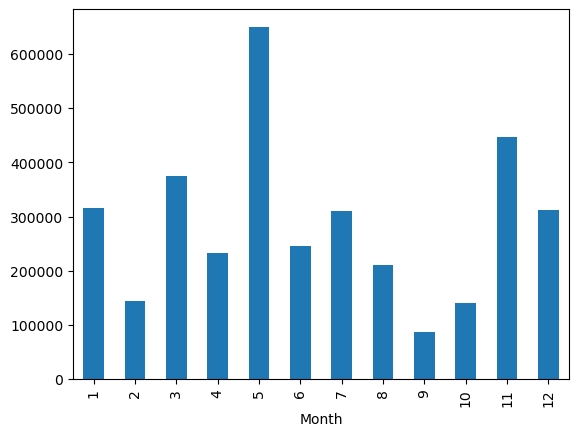

In [17]:
df.groupby(['Month'])['Receipt'].sum().plot.bar();

### Month wise profit/loss report

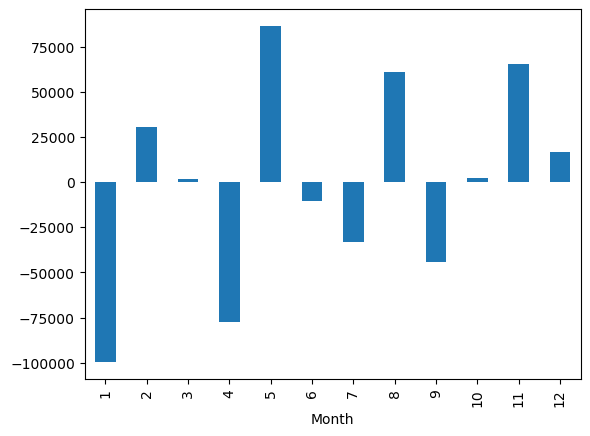

In [18]:
df.groupby(['Month'])['Profit'].sum().plot.bar();

### Checking details of the most profit making month - May

In [19]:
df[(df['Month'] == 5) & (df['Profit'] > 0)].iloc[:50]

,ID#,Date,Head,RCPT,Narration,Receipt,Payment,Profit,Month,Day
193,194,2022-05-05,Parish Hall Charges Collected(C),57,Thottakkunnel Albin,8000,0,8000,5,5
194,195,2022-05-05,Charges from Church Articles,58,Video charge,1000,0,1000,5,5
195,196,2022-05-05,Marriage Offerings (Passaram)(C),59,Pasaram varav - Thottakkunnel Albin,2000,0,2000,5,5
196,197,2022-05-05,Donation/Offering for Special Purposes(C),60,Alter boys tour donation,7500,0,7500,5,5
197,198,2022-05-05,Donation/Offering for Special Purposes(C),61,Alter boys tour donation,5000,0,5000,5,5
198,199,2022-05-05,Donation/Offering for Special Purposes(C),62,Tour donation by Arakkakkandathil Abin,2000,0,2000,5,5
229,230,2022-05-15,Family Aid Fund,67,Family apostholic piriv varav,3000,0,3000,5,15
230,231,2022-05-15,"Offerings, Auction, Bhandaram etc-(Nercha)(C)",68,kozhi leelam,300,0,300,5,15
231,232,2022-05-15,"Offerings, Auction, Bhandaram etc-(Nercha)(C)",69,Paavakka leelam,50,0,50,5,15
232,233,2022-05-15,"Offerings, Auction, Bhandaram etc-(Nercha)(C)",70,Pachakkari leelam,35,0,35,5,15


In [20]:
df_loan = df[df['Head'] == 'Loans & Advances-Paid']
df_loan

,ID#,Date,Head,RCPT,Narration,Receipt,Payment,Profit,Month,Day
1167,1168,2023-01-13,Loans & Advances-Paid,784,Loans paid to vicar,0,10000,-10000,1,13
1171,1172,2023-01-15,Loans & Advances-Paid,787,Loans paid to vicar,0,10000,-10000,1,15
1179,1180,2023-01-18,Loans & Advances-Paid,791,Loans paid to vicar,0,10000,-10000,1,18
1189,1190,2023-01-21,Loans & Advances-Paid,799,Loans paid to vicar,0,10000,-10000,1,21
1193,1194,2023-01-22,Loans & Advances-Paid,800,Loans paid to vicar,0,10000,-10000,1,22
1197,1198,2023-01-25,Loans & Advances-Paid,803,Loans paid to vicar,0,10000,-10000,1,25
1199,1200,2023-01-26,Loans & Advances-Paid,805,Loans paid to vicar,0,8000,-8000,1,26
1202,1203,2023-01-27,Loans & Advances-Paid,806,Loans paid to vicar,0,5000,-5000,1,27
1211,1212,2023-01-28,Loans & Advances-Paid,815,Loans paid to vicar,0,8000,-8000,1,28
1214,1215,2023-01-29,Loans & Advances-Paid,811,Loans paid to vicar,0,5000,-5000,1,29


In [21]:
df_loan.Payment.sum()

100000

#### Total payements within the whole financial year

In [22]:
df.Payment.sum()

3469747

#### Total Revenue for the whole financial year

In [23]:
df.Receipt.sum()

3468909

The total Revenue and payment amount is close to 35 lakhs

### Total  heads used 

In [24]:
df.Head.nunique()

68

In [25]:
unique_heads = df.Head.unique()
unique_heads

array(['Sunday School Expense', 'Offerings for Daily Expense(C)',
       'Offerings, Auction, Bhandaram etc-(Nercha)(C)',
       'Donation/Offering for Special Purposes(C)',
       'Parish Hall Charges Collected(C)', 'Repair & Maintenance',
       'STATIONARY', 'Telephone & Postage',
       'Donation from the Diocese Disbursed', 'Miscellaneous Expenses',
       'SOUTH INDIAN BANK - BHAVANA NIRMANAM',
       'Donation from Diocese for Charity Works', 'Travelling Expense',
       'bank s/b withdrawal', 'Church Feast - Expenses',
       "Seminarian's Aid Fund", 'Holy Land', 'Loans & Advances-Received',
       'Rev. Fr. Vicar', 'Hunger & Disease', 'A.K.C.C. Fund',
       'Justice Sunday', 'Jesus Fraternity',
       'Mission Syro Malabar (Preshithavaram)', 'SOUTH INDIAN BANK PALA',
       'Church Feast - Collection', 'Miscellaneous Income(C)',
       'Electricity Charges', 'Candle Offerings(C)', 'Accountant',
       'Sacristian', 'Sweeper', 'Marriage Offerings (Passaram)(C)',
       'Charge

#### Finding the transaction ways which made higher number of transactions

In [26]:
df_head = df.groupby(['Head'])['Head'].count().sort_values(ascending=False).reset_index(name = 'count').head(5)
df_head

,Head,count
0,Repair & Maintenance,223
1,STATIONARY,140
2,Sunday School Expense,127
3,Church Feast - Expenses,113
4,Donation/Offering for Special Purposes(C),106


#### Plotting the above findings to find the variation

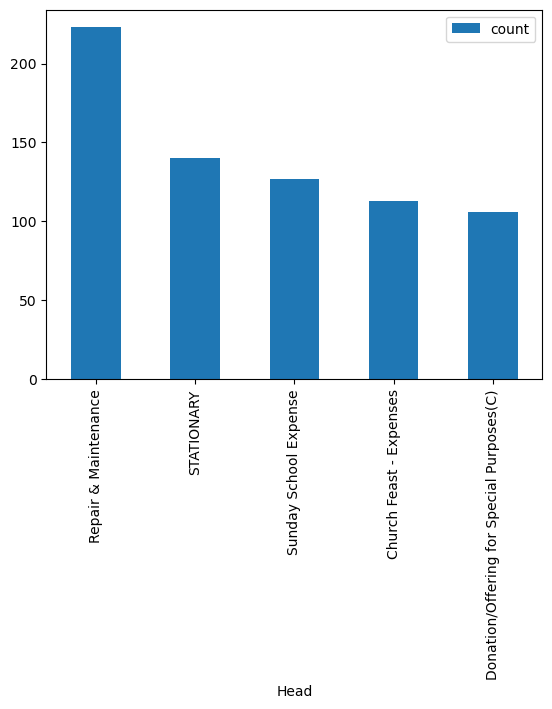

In [27]:
df_head.plot.bar(x='Head');

In [28]:
df_repair = df[df['Head'] == 'Repair & Maintenance']
df_repair

,ID#,Date,Head,RCPT,Narration,Receipt,Payment,Profit,Month,Day
9,10,2022-03-04,Repair & Maintenance,1,Generator diesel,0,3000,-3000,3,4
27,28,2022-06-04,Repair & Maintenance,15,For repairing refrigerator,0,700,-700,6,4
29,30,2022-06-04,Repair & Maintenance,17,For buying Fish food,0,58,-58,6,4
39,40,2022-07-04,Repair & Maintenance,35,"Palli cleaning - Milk, cherukadi",0,315,-315,7,4
53,54,2022-09-04,Repair & Maintenance,34,Generator repair,0,500,-500,9,4
...,...,...,...,...,...,...,...,...,...,...
1441,1442,2023-03-28,Repair & Maintenance,961,For repairing the amplifier of the Mike system,0,2900,-2900,3,28
1442,1443,2023-03-28,Repair & Maintenance,962,For buying electric products,0,748,-748,3,28
1443,1444,2023-03-28,Repair & Maintenance,963,For buying 3 taps,0,195,-195,3,28
1451,1452,2023-03-31,Repair & Maintenance,968,For buying gas for dhupakkutti,0,200,-200,3,31


#### Checking the profit of the heads which has higher number of transactions

In [29]:
for head in df_head.Head:
    heads = df[df['Head'] == head]
    print("The head profit of {} is ".format(head),heads.Profit.sum())

The head profit of Repair & Maintenance is  -487008
The head profit of STATIONARY is  -64136
The head profit of Sunday School Expense is  -130859
The head profit of Church Feast - Expenses is  -240657
The head profit of Donation/Offering for Special Purposes(C) is  323857


From this we could infer that the first 4 heads of most occuring transactions are showings losses.

#### Checking individual profit/loss value based on heads and checking the number of heads based on profit or loss

In [30]:
profit_count = 0
loss_count = 0
profits = {}
losses = {}
for head in unique_heads:
    heads = df[df['Head'] == head]
    profit = heads.Profit.sum()
    if profit > 0:
        profits[head] = profit
        profit_count+=1
    else:
        #l.append(head)
        losses[head] = profit
        loss_count+=1

print('Profit making heads')
print('*'*100)
for head1, prof in profits.items():
    print(" {} is {}".format(head1, prof))
print('*'*100)    
print('Loss making heads')
print('*'*100)
for head2, los in losses.items():
    print(" {} is {}".format(head2, los))
    
print('*'*100)
print('Total number of profit making heads',profit_count)
print('Total number of loss making heads',loss_count)

Profit making heads
****************************************************************************************************
 Offerings for Daily Expense(C) is 168634
 Offerings, Auction, Bhandaram etc-(Nercha)(C) is 176233
 Donation/Offering for Special Purposes(C) is 323857
 Parish Hall Charges Collected(C) is 127000
 Donation from Diocese for Charity Works is 109000
 bank s/b withdrawal is 402750
 Loans & Advances-Received is 233000
 SOUTH INDIAN BANK PALA is 122501
 Church Feast - Collection is 64686
 Miscellaneous Income(C) is 1750
 Candle Offerings(C) is 2617
 Marriage Offerings (Passaram)(C) is 29000
 Charges from Church Articles is 5090
 Offerings for Special Purpose(D) is 16320
 Advance from Agriculture Account is 189378
 FD Best Alter boy and girl is 80000
 FD Sunday School is 60000
 Bank Interest/ Other Interest Received (C) is 4161
 Donation & Gifts-Income(C) is 21830
 Sale of Old Things is 9733
 Tomb-Fees-Collected(C) is 46800
 Adima, Kazhunu, Mudi etc.(C) is 68426
 PARISH DIR

In [31]:
loss_percent = (loss_count/(profit_count+loss_count))*100
loss_percent

63.23529411764706

This shows that 63 % of heads shows losses based on the whole transaction
